<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Laboratorio 1

Trabajo de Laboratorio 1 correspondiente al Módulo 1 "Análisis y Visualización de Datos".  

### GRUPO 13:
#### Mariano Martín Gualpa ( mgualpa@gmail.com )
#### Laercio Simoes ( laercio@hpcbrasil.com )

Dataset:"Comic Characters"

Ubicación: https://github.com/fivethirtyeight/data/tree/master/comic-characters

Archivos:
* README.md: Descripción de los campos.
* dc-wikia-data.csv: Dataset correspondiente a los personajes de comic de la editorial DC.
* marvel-wikia-data.csv: Dataset correspondiente a los personajes de comic de la editorial DC.



Carga de librerías:

In [84]:
# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn
from scipy.stats import norm
from scipy.stats import stats
import matplotlib.pyplot as plt



Parámetros globales:

In [8]:
head_rows_to_show = 5
NO_AVAILABLE_LABEL = "NO AVAILABLE"
UNKNOWN_LABEL = "UNKNOWN"
OTHER_LABEL = "Other"


# 1. Carga del Dataset

## 1.1 Carga

Carga del dataset dc-wikia-data.csv correspondiente a la editorial DC Comics. Se presentan a continuación los primeros registros del datasets.

Se cargan ambos datasets por separado y se concatenan en uno mismo al que se le agrega un nuevo campo llamado editorial.

### 1.1.1 Carga del dataset dc-wikia-data.csv correspondiente a los personajes de DC Comics.

In [9]:
dcDataset = pandas.read_csv('comic-characters/dc-wikia-data.csv',
                          encoding='utf8')
dcRowsCountDataset = dcDataset.shape[0]
dcColsCountDataset = dcDataset.shape[1]
print("Registros: {}     Atributos: {}".format(dcRowsCountDataset, dcColsCountDataset))

dcDataset[:head_rows_to_show]

Registros: 6896     Atributos: 13


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


### 1.1.2 Carga del dataset marvel-wikia-data.csv correspondiente a los personajes de Marvel.

In [10]:
marvelDataset = pandas.read_csv('comic-characters/marvel-wikia-data.csv',
                          encoding='utf8')
marvelRowsCountDataset = marvelDataset.shape[0]
marvelColsCountDataset = marvelDataset.shape[1]
print("Registros: {}     Atributos: {}".format(marvelRowsCountDataset, marvelColsCountDataset))

marvelDataset[:head_rows_to_show]

Registros: 16376     Atributos: 13


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


## 1.2 Merge de ambos datasets en uno consolidado. 
Primero se debe agregar el atributo "publisher" a cada dataset y pasar a mayusculas los nombres de los atributos.

In [11]:
dcDataset.columns = dcDataset.columns.str.upper()
marvelDataset.columns = marvelDataset.columns.str.upper()
dcDataset["PUBLISHER"] = "DC Comics"
marvelDataset["PUBLISHER"] = "Marvel"

A continuación concatenamos ambos dataframes en uno.

In [12]:
comicsDF = pandas.concat([dcDataset, marvelDataset])
rowsCountComicsDF, colsCountComicsDF = comicsDF.shape

print("Registros: {}     Reg. DC + Marvel: {}       Atributos: {} ".format(rowsCountComicsDF, dcRowsCountDataset + marvelRowsCountDataset, colsCountComicsDF))
comicsDF[:head_rows_to_show]

Registros: 23272     Reg. DC + Marvel: 23272       Atributos: 14 


,PAGE_ID,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,PUBLISHER
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC Comics
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,DC Comics
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,DC Comics
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,DC Comics
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,DC Comics


# 2. Limpieza del Dataset. 

Se contabilizan por cada columna la cantidad de casos NaN. 

In [13]:
def printNaNCount(dataframe):
    print("Cantidad de NaN por columna:\n----------------------------")
    for col in dataframe.columns:
        print("{}: {}".format(col, sum(pandas.isnull(dataframe[col]))))


printNaNCount(comicsDF)


Cantidad de NaN por columna:
----------------------------
PAGE_ID: 0
NAME: 0
URLSLUG: 0
ID: 5783
ALIGN: 3413
EYE: 13395
HAIR: 6538
SEX: 979
GSM: 23118
ALIVE: 6
APPEARANCES: 1451
FIRST APPEARANCE: 884
YEAR: 884
PUBLISHER: 0


Puede consultarse la tabla para observarse los casos:

In [14]:
comicsDF[comicsDF['APPEARANCES'].isnull()]

,PAGE_ID,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,PUBLISHER
6541,306472,Matteo Bischoff (New Earth),\/wiki\/Matteo_Bischoff_(New_Earth),Secret Identity,Bad Characters,NaN,Grey Hair,Male Characters,NaN,Living Characters,NaN,"2012, May",2012.0,DC Comics
6542,273317,Doomslayer (New Earth),\/wiki\/Doomslayer_(New_Earth),Secret Identity,Bad Characters,Green Eyes,White Hair,Male Characters,NaN,Living Characters,NaN,"2011, July",2011.0,DC Comics
6543,242097,Emily Sung (New Earth),\/wiki\/Emily_Sung_(New_Earth),Secret Identity,Good Characters,Violet Eyes,Purple Hair,Female Characters,NaN,Living Characters,NaN,"2011, July",2011.0,DC Comics
6544,247494,Ry'jll (New Earth),\/wiki\/Ry%27jll_(New_Earth),Secret Identity,Good Characters,Green Eyes,NaN,Female Characters,NaN,Living Characters,NaN,"2011, October",2011.0,DC Comics
6545,161599,Baron Gestapo (New Earth),\/wiki\/Baron_Gestapo_(New_Earth),NaN,Bad Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,"2010, March",2010.0,DC Comics
6546,183059,Barro Cruzz (New Earth),\/wiki\/Barro_Cruzz_(New_Earth),NaN,NaN,NaN,NaN,Male Characters,NaN,Living Characters,NaN,"2010, November",2010.0,DC Comics
6547,202295,Barry Quinzel (New Earth),\/wiki\/Barry_Quinzel_(New_Earth),Public Identity,NaN,NaN,Black Hair,Male Characters,NaN,Living Characters,NaN,"2010, February",2010.0,DC Comics
6548,228571,Dragonfly II (New Earth),\/wiki\/Dragonfly_II_(New_Earth),Secret Identity,Bad Characters,NaN,Black Hair,Female Characters,NaN,Living Characters,NaN,"2010, May",2010.0,DC Comics
6549,179905,Altin Ad'Ms (New Earth),\/wiki\/Altin_Ad%27Ms_(New_Earth),Public Identity,Good Characters,White Eyes,NaN,Male Characters,NaN,Living Characters,NaN,"2010, July",2010.0,DC Comics
6550,192422,D'Kay D'Razz (New Earth),\/wiki\/D%27Kay_D%27Razz_(New_Earth),Secret Identity,Bad Characters,Red Eyes,NaN,Female Characters,NaN,Deceased Characters,NaN,"2010, July",2010.0,DC Comics


Se agrega la columna IS_GSM correspondiente a un atributo lógico "el personaje pertenece a una minoría de género o sexual", que se utilizará junto con el atributo GSM ya incluido en los datasets originales (que indica la minoría o NaN si no pertenece). Además, se comparan los dominios de cada atributo en los dos datasets originales.

In [15]:
# Imprimir dominios
for col in ("ALIGN","ID", "EYE", "HAIR", "SEX", "GSM", "ALIVE"):
    print("-------------\nATRIBUTE: {}\n-------------\nDC: {} \nMarvel:{}".format(col, dcDataset[col].unique(), marvelDataset[col].unique()))

-------------
ATRIBUTE: ALIGN
-------------
DC: ['Good Characters' 'Bad Characters' 'Neutral Characters' nan
 'Reformed Criminals'] 
Marvel:['Good Characters' 'Neutral Characters' 'Bad Characters' nan]
-------------
ATRIBUTE: ID
-------------
DC: ['Secret Identity' 'Public Identity' nan 'Identity Unknown'] 
Marvel:['Secret Identity' 'Public Identity' 'No Dual Identity'
 'Known to Authorities Identity' nan]
-------------
ATRIBUTE: EYE
-------------
DC: ['Blue Eyes' 'Brown Eyes' 'Green Eyes' 'Purple Eyes' 'Black Eyes'
 'White Eyes' 'Red Eyes' 'Photocellular Eyes' 'Hazel Eyes' 'Amber Eyes'
 'Yellow Eyes' nan 'Grey Eyes' 'Pink Eyes' 'Violet Eyes' 'Gold Eyes'
 'Orange Eyes' 'Auburn Hair'] 
Marvel:['Hazel Eyes' 'Blue Eyes' 'Brown Eyes' 'Green Eyes' 'Grey Eyes'
 'Yellow Eyes' 'Gold Eyes' 'Red Eyes' 'Black Eyeballs' 'Amber Eyes'
 'Variable Eyes' nan 'Black Eyes' 'White Eyes' 'Orange Eyes' 'Silver Eyes'
 'Purple Eyes' 'Pink Eyes' 'One Eye' 'Violet Eyes' 'Multiple Eyes'
 'Magenta Eyes' 'Yellow E

A partir del análisis de los datos, cantidad de NaN por columna y valores en los dominios, se plantean las siguientes modificaciones en los datos:
* En los campos ID, ALIGN, EYE, HAIR, SEX y ALIVE, los NaN se reemplazarán por una etiqueta única contenida en la constante UNKNOWN_LABEL. De esta manera, se tratan a todos los casos NaN de esos campos como un valor etiquedato como "Desconocido" (sin poder especificar si es porque no fue cargado o porque no le corresponde un valor).
* Se crea el campo lógico "IS_GSM" que corresponde a Verdadero si tiene asignado un valor en el campo GSM (que en los casos que aplica, indica el tipo de minoría de género o sexual a la que corresponde). Indica Falso si GSM contenía un NaN.
* Se crea el campo "GENDER", con la siguiente lógica: Si corresponde a minoría de genero o sexual indica cual, sino, indica el valor del campo "SEX". Este campo permite consolidar los campos SEX y GSM.
* Se unifica el dominio en el campo SEX, pues DC y Marvel tienen etiquetas diferentes ("Agender" y "Genderless" respectivamente) que se refieren al mismo valor.  
* Se eliminan los registros donde "APPEAREANCES" y/o "YEAR" tienen valor NaN.

In [16]:
comicsDF['ID'] = comicsDF['ID'].replace(numpy.nan, UNKNOWN_LABEL)
comicsDF['ALIGN'] = comicsDF['ALIGN'].replace(numpy.nan, UNKNOWN_LABEL)
comicsDF['EYE'] = comicsDF['EYE'].replace(numpy.nan, UNKNOWN_LABEL)
comicsDF['HAIR'] = comicsDF['HAIR'].replace(numpy.nan, UNKNOWN_LABEL)
comicsDF['SEX'] = comicsDF['SEX'].replace(numpy.nan, UNKNOWN_LABEL)
comicsDF['SEX'] = comicsDF['SEX'].replace("Agender Characters", "Genderless Characters") #Marvel usa "Agender" que es sinonimo de "Genderless" en DC
comicsDF['IS_GSM'] = ~ comicsDF['GSM'].isnull() # En GSM se dejan los NaN pero se agrega otra columna IS_GSM 
comicsDF["GENDER"] = comicsDF.apply(lambda row: row['GSM'] if row['IS_GSM'] else row['SEX'], axis = 1) # Agrega campo "GENDER"
comicsDF['ALIVE'] = comicsDF['ALIVE'].replace(numpy.nan, UNKNOWN_LABEL)

# Imprimir cuenta de valores NaN por columna
printNaNCount(comicsDF)

Cantidad de NaN por columna:
----------------------------
PAGE_ID: 0
NAME: 0
URLSLUG: 0
ID: 0
ALIGN: 0
EYE: 0
HAIR: 0
SEX: 0
GSM: 23118
ALIVE: 0
APPEARANCES: 1451
FIRST APPEARANCE: 884
YEAR: 884
PUBLISHER: 0
IS_GSM: 0
GENDER: 0


Se verifica que existen valores faltantes para el atributo "APPEAREANCES" (cantidad de apariciones) y "YEAR" (año de primera publicación). Tras analizar en detalle los casos, se decide eliminar los registros correspondientes. 


In [17]:
countNaNAppearences = len(comicsDF[comicsDF["APPEARANCES"].isnull()])
countNaNYear = len(comicsDF[comicsDF["YEAR"].isnull()])

countBeforeCleanRows = len(comicsDF)
comicsDF = comicsDF.dropna(subset=['APPEARANCES', 'YEAR'])
countRows = len(comicsDF)
deletedRows = countBeforeCleanRows - countRows
print("Cantidad de registros con NaN en:  APPERANCES = {}   YEAR = {} ".format(countNaNAppearences, countNaNYear))
print("Cantidad antes de eliminar APPEAREANCES = NaN: ", countBeforeCleanRows)
print("Cantidad despues de eliminar APPEAREANCES = NaN: ", countRows)
print("Cantidad de registros eliminados: ", deletedRows)


Cantidad de registros con NaN en:  APPERANCES = 1451   YEAR = 884 
Cantidad antes de eliminar APPEAREANCES = NaN:  23272
Cantidad despues de eliminar APPEAREANCES = NaN:  21146
Cantidad de registros eliminados:  2126


In [18]:
## Operaciones Interesantes de Consulta sobre DataFrames.
#comicsDF[comicsDF['NAME'].str.contains("Batman")] # Mostrar todos los Batman
#comicsDF.NAME.str.extract('(.*?)\(', expand=True)[0].value_counts() # Recuperar la cantidad de veces que se repite el nombre


# 2.2. Dataset Adicional Sobre Estados Unidos
Dado que el dataset de Comics tiene una única variable cuantitativa relevante (la cantidad de apariciones por personaje), se opto por crear un nuevo dataset en el que se agrupa por año la cantidad de personajes que aparecen cada año (YEAR indica el año de aparición del personaje, por lo que agrupando por este campo se obtiene el valor requerido).
Por otro lado, se carga un dataset obtenido a partir de otro del banco mundial, con algunos indicadores económicos de Estados Unidos. Se realiza un JOIN de ambas tablas por año como criterio de emparejamiento.


In [246]:
usaDF = pandas.read_csv('other-data/data_usa.csv', delimiter = ';', decimal = ',', encoding='utf8')
print("Registros: {}     Atributos: {}".format(dcDataset.shape[0], dcDataset.shape[1]))

usaDF.index = usaDF.YEAR
usaDF.head()


Registros: 57     Atributos: 4


,YEAR,INSCRIPCION_ESCOLAR_PROCENTUAL,GASTO_MILITAR_PORC_PIB,GASTO_MILITAR_UMN_PRECIO_ACTUAL
YEAR,,,,
1960,1960,NaN,8.352660,4.538000e+10
1961,1961,NaN,8.487129,4.780800e+10
1962,1962,NaN,8.656586,5.238100e+10
1963,1963,NaN,8.189007,5.229500e+10
1964,1964,NaN,7.467629,5.121300e+10


Se crean tres columnas nuevas en comicsDF que serviran para contar por año (en el agrupado charactersByYearDF), la cantidad de personajes nuevos de DC Comics ("IS_DCCOMICS"), la cantidad de personajes nuevos en Marvel ("IS_MARVEL") y la cantidad de personajes totales nuevos por año ("NEW_CHARACTERS").

In [247]:
comicsDF['IS_DCCOMICS'] = (comicsDF['PUBLISHER'] == "DC Comics")
comicsDF['IS_MARVEL'] = (comicsDF['PUBLISHER'] == "Marvel")
comicsDF['NEW_CHARACTERS'] = (True)

charactersByYearDF = comicsDF.groupby('YEAR').sum()
charactersByYearDF.head()

,PAGE_ID,APPEARANCES,IS_GSM,IS_DCCOMICS,IS_MARVEL,TOTAL,NEW_CHARACTERS
YEAR,,,,,,,
1935.0,1702,125.0,0.0,1.0,0.0,1.0,1.0
1936.0,996058,240.0,0.0,8.0,0.0,8.0,8.0
1937.0,235120,458.0,0.0,4.0,0.0,4.0,4.0
1938.0,503817,1639.0,0.0,10.0,0.0,10.0,10.0
1939.0,34716897,5080.0,0.0,18.0,66.0,84.0,84.0


Se eliminan columnas que no se utilizan.

In [248]:
charactersByYearDF = charactersByYearDF.drop('APPEARANCES', axis = 1)
charactersByYearDF = charactersByYearDF.drop('IS_GSM', axis = 1)
charactersByYearDF = charactersByYearDF.drop('TOTAL', axis = 1)


Se realiza el join entre ambos datasets, eliminando los NaN de GASTO_MILITAR_PORC_PIB y GASTO_MILITAR_UMN_PRECIO_ACTUAL (de dejan los de INSCRIPCION_ESCOLAR_PROCENTUAL que se analizarán en otro dataframe).

In [303]:
militaryByYearDF = pandas.concat([charactersByYearDF, usaDF], axis=1, join='inner')
militaryByYearDF = militaryByYearDF.dropna(subset=['GASTO_MILITAR_PORC_PIB', 'GASTO_MILITAR_UMN_PRECIO_ACTUAL'])
militaryByYearDF.head()

,PAGE_ID,IS_DCCOMICS,IS_MARVEL,NEW_CHARACTERS,YEAR,INSCRIPCION_ESCOLAR_PROCENTUAL,GASTO_MILITAR_PORC_PIB,GASTO_MILITAR_UMN_PRECIO_ACTUAL
YEAR,,,,,,,,
1960,12628339,38.0,37.0,75.0,1960,NaN,8.352660,4.538000e+10
1961,19178963,50.0,74.0,124.0,1961,NaN,8.487129,4.780800e+10
1962,22523053,41.0,102.0,143.0,1962,NaN,8.656586,5.238100e+10
1963,28843719,39.0,180.0,219.0,1963,NaN,8.189007,5.229500e+10
1964,35332214,31.0,165.0,196.0,1964,NaN,7.467629,5.121300e+10


Se realiza el join entre ambos datasets, ahora eliminando los NaN de INSCRIPCION_ESCOLAR_PROCENTUAL.

In [250]:
#byYearDF = byYearDF.dropna(subset=['INSCRIPCION_ESCOLAR_PROCENTUAL', 'GASTO_MILITAR_PORC_PIB', 'GASTO_MILITAR_UMN_PRECIO_ACTUAL'])
educationByYearDF = pandas.concat([charactersByYearDF, usaDF], axis=1, join='inner')
educationByYearDF = educationByYearDF.dropna(subset=['INSCRIPCION_ESCOLAR_PROCENTUAL'])
educationByYearDF.head()


,PAGE_ID,IS_DCCOMICS,IS_MARVEL,NEW_CHARACTERS,YEAR,INSCRIPCION_ESCOLAR_PROCENTUAL,GASTO_MILITAR_PORC_PIB,GASTO_MILITAR_UMN_PRECIO_ACTUAL
YEAR,,,,,,,,
1971,42531871,63.0,106.0,169.0,1971,88.828720,6.410680,7.486200e+10
1972,53918454,61.0,179.0,240.0,1972,88.390877,6.053964,7.763900e+10
1973,56816864,20.0,231.0,251.0,1973,90.673431,5.485146,7.835800e+10
1974,62331947,15.0,235.0,250.0,1974,89.777481,5.546527,8.590600e+10
1975,70810200,38.0,271.0,309.0,1975,89.568588,5.234105,8.840000e+10


# 3. Análisis y Visualización de los Datos
## 3.1. Estadísticas Descriptivas

Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad. 

¿Responden a alguna distribución conocida?
Realizar un análisis de outliers.

Explicar cómo varían las métricas cuando desglosamos por género. 

¿Responden a alguna distribución conocida? 

Comparar cualitativamente y gráficamente ambas distribuciones. 

Calcular la correlación entre todas estas variables y mostrarla con un gráfico conjunto.


In [288]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

def plot_chart(x, y, title, show_line=True, type = "bar"):
    plt.figure(figsize=(10,8))
    plt.subplot(313)
    if (type=="bar"):
        plt.bar(x, y, color="blue")
    elif (type == "scatter"): 
        plt.scatter(x, y, color="blue")
    elif (type == "plot"):
        plt.plot(x, y, color="blue")
    plt.xticks(rotation=90)
    if (show_line):
        plt.plot(x, y, color="red", linestyle='--')
    plt.title(title)


In [267]:
militaryByYearDF.corr()


,PAGE_ID,IS_DCCOMICS,IS_MARVEL,NEW_CHARACTERS,YEAR,INSCRIPCION_ESCOLAR_PROCENTUAL,GASTO_MILITAR_PORC_PIB,GASTO_MILITAR_UMN_PRECIO_ACTUAL
PAGE_ID,1.000000,0.692831,0.791180,0.827667,0.826613,0.472599,-0.672360,0.822775
IS_DCCOMICS,0.692831,1.000000,0.623383,0.881657,0.577349,0.664408,-0.431161,0.550336
IS_MARVEL,0.791180,0.623383,1.000000,0.918590,0.603239,0.450004,-0.667349,0.474737
NEW_CHARACTERS,0.827667,0.881657,0.918590,1.000000,0.655874,0.637411,-0.620676,0.564669
YEAR,0.826613,0.577349,0.603239,0.655874,1.000000,0.636374,-0.839303,0.932152
INSCRIPCION_ESCOLAR_PROCENTUAL,0.472599,0.664408,0.450004,0.637411,0.636374,1.000000,-0.435793,0.516209
GASTO_MILITAR_PORC_PIB,-0.672360,-0.431161,-0.667349,-0.620676,-0.839303,-0.435793,1.000000,-0.612238
GASTO_MILITAR_UMN_PRECIO_ACTUAL,0.822775,0.550336,0.474737,0.564669,0.932152,0.516209,-0.612238,1.000000


In [268]:
educationByYearDF.corr()

,PAGE_ID,IS_DCCOMICS,IS_MARVEL,NEW_CHARACTERS,YEAR,INSCRIPCION_ESCOLAR_PROCENTUAL,GASTO_MILITAR_PORC_PIB,GASTO_MILITAR_UMN_PRECIO_ACTUAL
PAGE_ID,1.000000,0.618043,0.660734,0.735239,0.724012,0.472599,-0.387870,0.768238
IS_DCCOMICS,0.618043,1.000000,0.514592,0.863738,0.472610,0.664408,-0.190589,0.465466
IS_MARVEL,0.660734,0.514592,1.000000,0.876570,0.318398,0.450004,-0.361678,0.253290
NEW_CHARACTERS,0.735239,0.863738,0.876570,1.000000,0.452406,0.637411,-0.319547,0.410131
YEAR,0.724012,0.472610,0.318398,0.452406,1.000000,0.636374,-0.677021,0.937623
INSCRIPCION_ESCOLAR_PROCENTUAL,0.472599,0.664408,0.450004,0.637411,0.636374,1.000000,-0.435793,0.516209
GASTO_MILITAR_PORC_PIB,-0.387870,-0.190589,-0.361678,-0.319547,-0.677021,-0.435793,1.000000,-0.409030
GASTO_MILITAR_UMN_PRECIO_ACTUAL,0.768238,0.465466,0.253290,0.410131,0.937623,0.516209,-0.409030,1.000000


Comparando las correlaciones entre ambos dataframes, se observa por los coeficientes de correlación que se pierde mucha de esta (en los gastos militares vs cantidad de personajes nuevos) cuando se eliminan los NaN de INSCRIPCION_ESCOLAR_PROCENTUAL, pero de esta no cambia si solo se eliminan los NaN de los gastos militares. Por ello, se sigue trabajando con el primer dataframe (militaryByYearDF).

Se eligen como variables cuantitativas a estudiar:
    * NEW_CHARACTERS: Cantidad de nuevos personajes por año.
    * INSCRIPCION_ESCOLAR_PROCENTUAL: Porcentaje anual de inscripción a educación escolar sobre el bruto en Estados Unidos. 
    * GASTO_MILITAR_PORC_PIB: Gasto anual militar como porcentaje del PBI de Estados Unidos.
    * GASTO_MILITAR_UMN_PRECIO_ACTUAL: Gasto anual militar en u$s a valor actual de Estados Unidos.

### 3.1.1. Calculo de medidas descriptivas. Gráficas de histogramas y variaciones respecto a YEAR.

In [269]:
def showStat(s, year):
    print("For {}:".format(s.name))
    if (len(s.mode())==1):
        print("mode: {}".format(s.mode()))
    print("median: {}".format(s.median()))
    print("mean: {}".format(s.mean()))
    print("std: {}".format(s.std()))    
    print(s.describe())
    s.hist(bins=8)
    plot_chart(year, s.values, "{} by {}".format(s.name, year.name), show_line=False)


For NEW_CHARACTERS:
mode: 0    317.0
dtype: float64
median: 341.5
mean: 351.1111111111111
std: 155.10637453497407
count     54.000000
mean     351.111111
std      155.106375
min       75.000000
25%      224.750000
50%      341.500000
75%      467.750000
max      726.000000
Name: NEW_CHARACTERS, dtype: float64


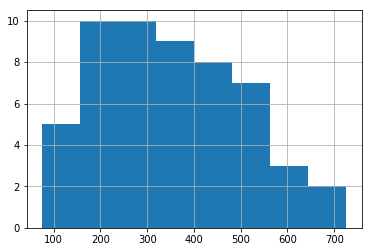

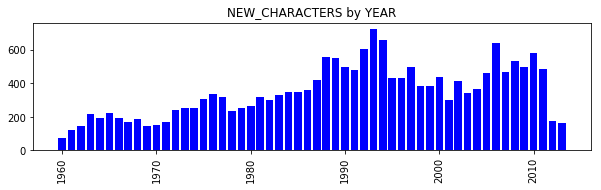

In [289]:
showStat(militaryByYearDF.NEW_CHARACTERS, militaryByYearDF.YEAR)


For INSCRIPCION_ESCOLAR_PROCENTUAL:
median: 98.81971741
mean: 98.08272532923078
std: 4.950167890749723
count     39.000000
mean      98.082725
std        4.950168
min       88.390877
25%       97.779537
50%       98.819717
75%      101.283855
max      105.805656
Name: INSCRIPCION_ESCOLAR_PROCENTUAL, dtype: float64


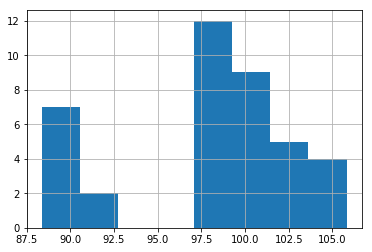

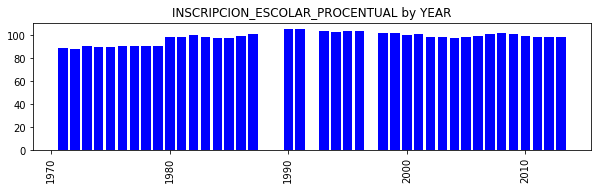

In [271]:
showStat(militaryByYearDF.INSCRIPCION_ESCOLAR_PROCENTUAL, militaryByYearDF.YEAR)


For GASTO_MILITAR_PORC_PIB:
median: 4.8428296895
mean: 5.301938718299493
std: 1.694775162865606
count    54.000000
mean      5.301939
std       1.694775
min       2.908394
25%       3.870605
50%       4.842830
75%       6.106555
max       8.755715
Name: GASTO_MILITAR_PORC_PIB, dtype: float64


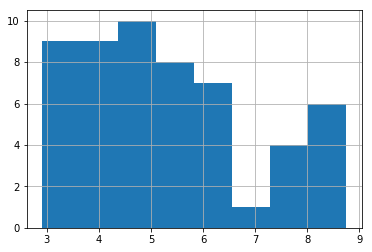

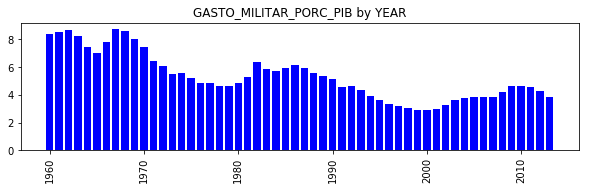

In [272]:
showStat(militaryByYearDF.GASTO_MILITAR_PORC_PIB, militaryByYearDF.YEAR)



For GASTO_MILITAR_UMN_PRECIO_ACTUAL:
mode: 0    2.136260e+11
dtype: float64
median: 272847500000.0
mean: 263404555555.55554
std: 196463953846.7089
count    5.400000e+01
mean     2.634046e+11
std      1.964640e+11
min      4.538000e+10
25%      8.255875e+10
50%      2.728475e+11
75%      3.059128e+11
max      7.113380e+11
Name: GASTO_MILITAR_UMN_PRECIO_ACTUAL, dtype: float64


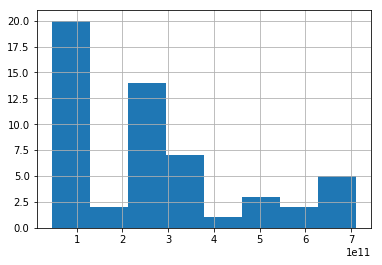

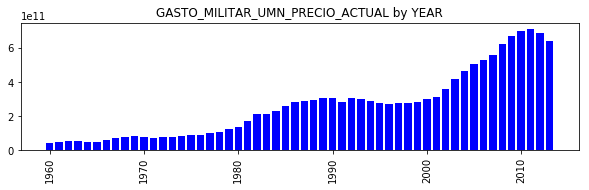

In [273]:
showStat(militaryByYearDF.GASTO_MILITAR_UMN_PRECIO_ACTUAL, militaryByYearDF.YEAR)



### 3.1.2. Análisis de Outliers
Se grafican y analizan los outliers para las series estudiadas.

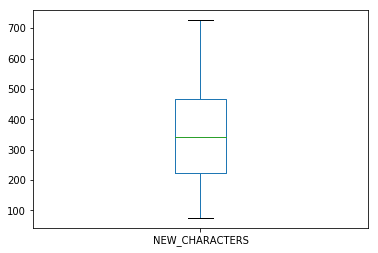

In [274]:
militaryByYearDF.NEW_CHARACTERS.plot.box()


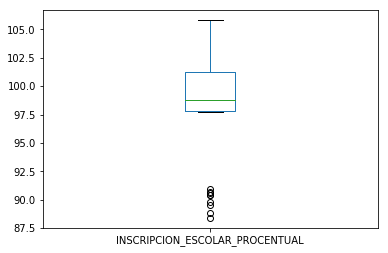

In [275]:
militaryByYearDF.INSCRIPCION_ESCOLAR_PROCENTUAL.plot.box()


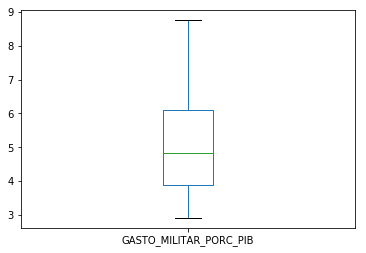

In [276]:
militaryByYearDF.GASTO_MILITAR_PORC_PIB.plot.box()


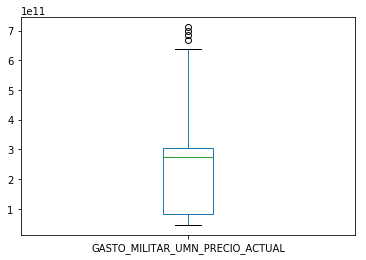

In [277]:
militaryByYearDF.GASTO_MILITAR_UMN_PRECIO_ACTUAL.plot.box()


Se puede observar la existencia de outliers en las columnas:
* INSCRIPCION_ESCOLAR_PROCENTUAL
* GASTO_MILITAR_UMN_PRECIO_ACTUAL.

Esto puede observarse por los circulos en el plotbox, pero tambien puede verificarse en los histogramas, donde se observan frecuencias altas en los extremos alejadas de los valores donde se concentran la mayoria de las observaciones.

### 3.1.3. Correlaciones
Se deja para el final el analisis de desglose pues el mismo no puede hacerse sobre estas variables.


In [298]:
militaryByYearDF.corr()


,PAGE_ID,IS_DCCOMICS,IS_MARVEL,NEW_CHARACTERS,YEAR,INSCRIPCION_ESCOLAR_PROCENTUAL,GASTO_MILITAR_PORC_PIB,GASTO_MILITAR_UMN_PRECIO_ACTUAL
PAGE_ID,1.000000,0.692831,0.791180,0.827667,0.826613,0.472599,-0.672360,0.822775
IS_DCCOMICS,0.692831,1.000000,0.623383,0.881657,0.577349,0.664408,-0.431161,0.550336
IS_MARVEL,0.791180,0.623383,1.000000,0.918590,0.603239,0.450004,-0.667349,0.474737
NEW_CHARACTERS,0.827667,0.881657,0.918590,1.000000,0.655874,0.637411,-0.620676,0.564669
YEAR,0.826613,0.577349,0.603239,0.655874,1.000000,0.636374,-0.839303,0.932152
INSCRIPCION_ESCOLAR_PROCENTUAL,0.472599,0.664408,0.450004,0.637411,0.636374,1.000000,-0.435793,0.516209
GASTO_MILITAR_PORC_PIB,-0.672360,-0.431161,-0.667349,-0.620676,-0.839303,-0.435793,1.000000,-0.612238
GASTO_MILITAR_UMN_PRECIO_ACTUAL,0.822775,0.550336,0.474737,0.564669,0.932152,0.516209,-0.612238,1.000000


Puede observarse una correlación interesante entre la cantidad de personajes nuevos (NEW_CHARACTERS) y las otras columnas de interés:
* INSCRIPCION_ESCOLAR_PROCENTUAL (correlación de 0.637411): Indica que existe un nivel interesante de correlación entre las variables, que al ser positivo indica que crecen y decrecen al únisono.
* GASTO_MILITAR_PORC_PIB: (correlación de -0.620676): Indica la existencia de un nivel interesante de correlación, en este caso negativo, por lo que el aumento de una está relacionado a la disminución de la otra.
* GASTO_MILITAR_UMN_PRECIO_ACTUAL (correlación de 0.564669): Indica que existe un nivel interesante de correlación entre las variables, que al ser positivo indica que crecen y decrecen al únisono.

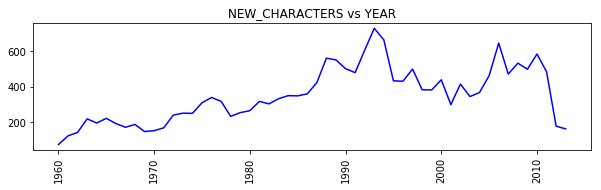

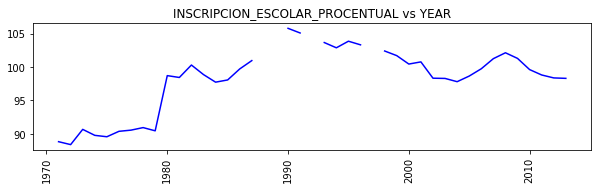

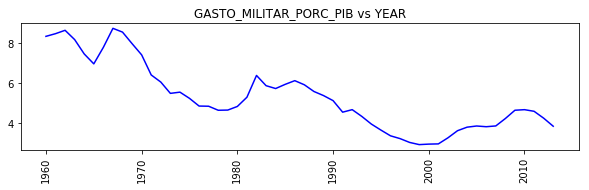

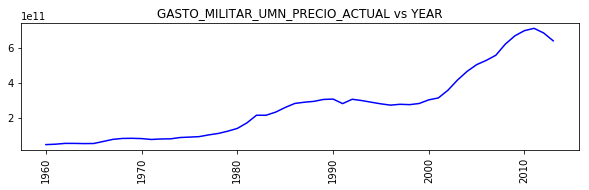

In [295]:
plot_chart(militaryByYearDF.YEAR, militaryByYearDF.NEW_CHARACTERS, "NEW_CHARACTERS vs YEAR", show_line=False, type = "plot")
plot_chart(militaryByYearDF.YEAR, militaryByYearDF.INSCRIPCION_ESCOLAR_PROCENTUAL, "INSCRIPCION_ESCOLAR_PROCENTUAL vs YEAR", show_line=False, type = "plot")
plot_chart(militaryByYearDF.YEAR, militaryByYearDF.GASTO_MILITAR_PORC_PIB, "GASTO_MILITAR_PORC_PIB vs YEAR", show_line=False, type = "plot")
plot_chart(militaryByYearDF.YEAR, militaryByYearDF.GASTO_MILITAR_UMN_PRECIO_ACTUAL, "GASTO_MILITAR_UMN_PRECIO_ACTUAL vs YEAR", show_line=False, type = "plot")



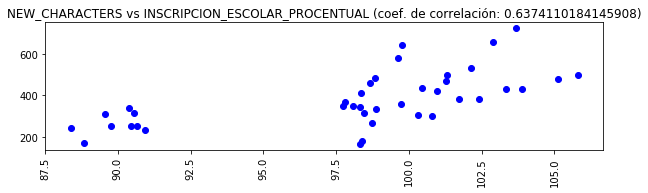

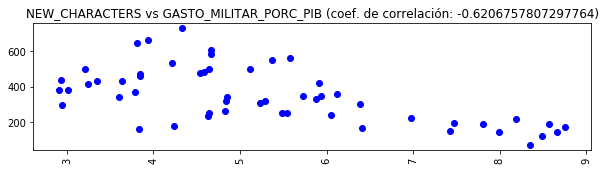

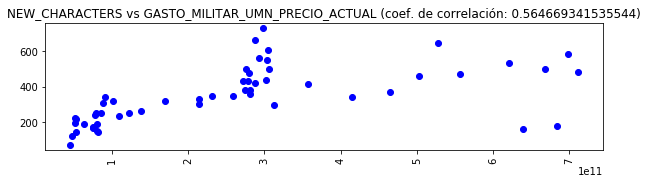

In [299]:
plot_chart(militaryByYearDF.INSCRIPCION_ESCOLAR_PROCENTUAL, militaryByYearDF.NEW_CHARACTERS, "NEW_CHARACTERS vs INSCRIPCION_ESCOLAR_PROCENTUAL (coef. de correlación: {})".format(militaryByYearDF.corr()['NEW_CHARACTERS']['INSCRIPCION_ESCOLAR_PROCENTUAL']), show_line=False, type = "scatter")
plot_chart(militaryByYearDF.GASTO_MILITAR_PORC_PIB, militaryByYearDF.NEW_CHARACTERS, "NEW_CHARACTERS vs GASTO_MILITAR_PORC_PIB (coef. de correlación: {})".format(militaryByYearDF.corr()['NEW_CHARACTERS']['GASTO_MILITAR_PORC_PIB']), show_line=False, type = "scatter")
plot_chart(militaryByYearDF.GASTO_MILITAR_UMN_PRECIO_ACTUAL, militaryByYearDF.NEW_CHARACTERS, "NEW_CHARACTERS vs GASTO_MILITAR_UMN_PRECIO_ACTUAL (coef. de correlación: {})".format(militaryByYearDF.corr()['NEW_CHARACTERS']['GASTO_MILITAR_UMN_PRECIO_ACTUAL']), show_line=False, type = "scatter")



### 3.1.3 Desglose por Publicadora ("PUBLISHER")

Vamos a comparar la variable NEW_CHARACTERS por publicadora. Primero, revisaremos los datos de NEW_CHARACTERS, luego la misma variable según DC Comics ("IS_DCCOMICS") y luego por Marvel ("IS_MARVEL"):


For NEW_CHARACTERS:
mode: 0    317.0
dtype: float64
median: 341.5
mean: 351.1111111111111
std: 155.10637453497407
count     54.000000
mean     351.111111
std      155.106375
min       75.000000
25%      224.750000
50%      341.500000
75%      467.750000
max      726.000000
Name: NEW_CHARACTERS, dtype: float64


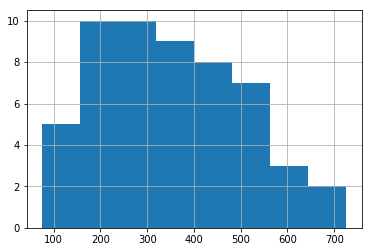

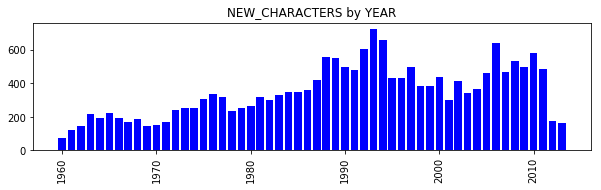

In [304]:
showStat(militaryByYearDF.NEW_CHARACTERS, militaryByYearDF.YEAR)



For IS_DCCOMICS:
median: 102.0
mean: 112.22222222222223
std: 78.3970702828289
count     54.000000
mean     112.222222
std       78.397070
min        1.000000
25%       45.000000
50%      102.000000
75%      165.250000
max      287.000000
Name: IS_DCCOMICS, dtype: float64


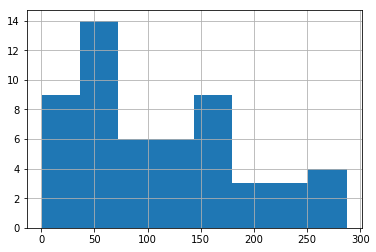

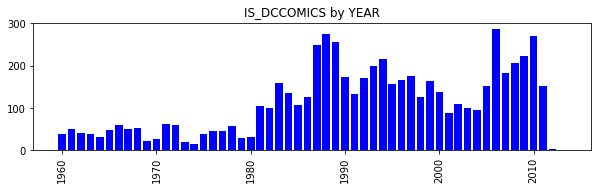

In [305]:
showStat(militaryByYearDF.IS_DCCOMICS, militaryByYearDF.YEAR)



For IS_MARVEL:
mode: 0    174.0
dtype: float64
median: 234.5
mean: 238.88888888888889
std: 93.60770542921811
count     54.000000
mean     238.888889
std       93.607705
min       37.000000
25%      174.000000
50%      234.500000
75%      293.750000
max      528.000000
Name: IS_MARVEL, dtype: float64


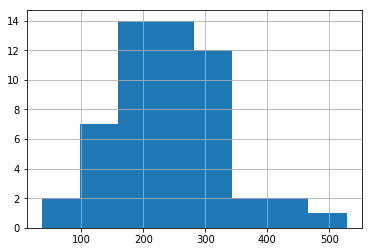

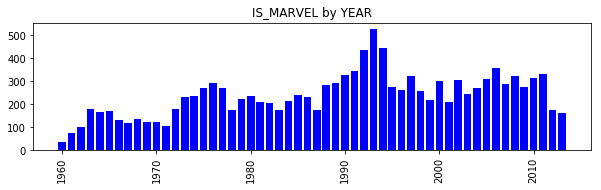

In [306]:
showStat(militaryByYearDF.IS_MARVEL, militaryByYearDF.YEAR)



## 3.1.2. OTRAS MEDICIONES
Corresponden a pruebas anteriores

In [19]:
comicsDF.groupby(['ID'])['APPEARANCES'].mean()


ID
Identity Unknown                  3.000000
Known to Authorities Identity    74.400000
No Dual Identity                 25.579777
Public Identity                  25.492544
Secret Identity                  22.071267
UNKNOWN                           5.337151
Name: APPEARANCES, dtype: float64

In [20]:
comicsDF.groupby(['ALIGN'])['APPEARANCES'].mean()


ALIGN
Bad Characters         9.165288
Good Characters       36.641162
Neutral Characters    20.253180
Reformed Criminals    29.666667
UNKNOWN                9.357640
Name: APPEARANCES, dtype: float64

In [21]:
comicsDF.groupby(['SEX'])['APPEARANCES'].mean()



SEX
Female Characters          21.370803
Genderfluid Characters    282.500000
Genderless Characters      19.884615
Male Characters            19.344069
Transgender Characters      4.000000
UNKNOWN                     5.245146
Name: APPEARANCES, dtype: float64

In [22]:
comicsDF.groupby(['GSM'])['APPEARANCES'].mean()



GSM
Bisexual Characters       186.000000
Genderfluid Characters     33.000000
Homosexual Characters      44.711712
Pansexual Characters      150.000000
Transgender Characters     34.500000
Transvestites             500.000000
Name: APPEARANCES, dtype: float64

In [23]:
comicsDF.groupby(['ALIVE'])['APPEARANCES'].mean()

ALIVE
Deceased Characters    15.145465
Living Characters      20.657445
UNKNOWN                 7.000000
Name: APPEARANCES, dtype: float64

In [24]:
comicsDF

,PAGE_ID,NAME,URLSLUG,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,PUBLISHER,IS_GSM,GENDER
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC Comics,False,Male Characters
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,DC Comics,False,Male Characters
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,DC Comics,False,Male Characters
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,DC Comics,False,Male Characters
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,DC Comics,False,Male Characters
5,1448,Wonder Woman (Diana Prince),\/wiki\/Wonder_Woman_(Diana_Prince),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,NaN,Living Characters,1231.0,"1941, December",1941.0,DC Comics,False,Female Characters
6,1486,Aquaman (Arthur Curry),\/wiki\/Aquaman_(Arthur_Curry),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1121.0,"1941, November",1941.0,DC Comics,False,Male Characters
7,1451,Timothy Drake (New Earth),\/wiki\/Timothy_Drake_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1095.0,"1989, August",1989.0,DC Comics,False,Male Characters
8,71760,Dinah Laurel Lance (New Earth),\/wiki\/Dinah_Laurel_Lance_(New_Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,NaN,Living Characters,1075.0,"1969, November",1969.0,DC Comics,False,Female Characters
9,1380,Flash (Barry Allen),\/wiki\/Flash_(Barry_Allen),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1028.0,"1956, October",1956.0,DC Comics,False,Male Characters


In [25]:
comicsDF.groupby(['GENDER'])['APPEARANCES'].count()

GENDER
Bisexual Characters          29
Female Characters          5239
Genderfluid Characters        1
Genderless Characters        51
Homosexual Characters       111
Male Characters           14886
Pansexual Characters          1
Transgender Characters        3
Transvestites                 1
UNKNOWN                     824
Name: APPEARANCES, dtype: int64

In [26]:
comicsDF.groupby(['GENDER'])['APPEARANCES'].mean()

GENDER
Bisexual Characters       186.000000
Female Characters          20.590571
Genderfluid Characters     33.000000
Genderless Characters      19.882353
Homosexual Characters      44.711712
Male Characters            19.104796
Pansexual Characters      150.000000
Transgender Characters     24.333333
Transvestites             500.000000
UNKNOWN                     5.245146
Name: APPEARANCES, dtype: float64

In [27]:
comicsDF.groupby(['GENDER', 'ALIVE'])['APPEARANCES'].count()

GENDER                  ALIVE              
Bisexual Characters     Deceased Characters        4
                        Living Characters         25
Female Characters       Deceased Characters     1065
                        Living Characters       4173
                        UNKNOWN                    1
Genderfluid Characters  Living Characters          1
Genderless Characters   Deceased Characters       11
                        Living Characters         40
Homosexual Characters   Deceased Characters       22
                        Living Characters         88
                        UNKNOWN                    1
Male Characters         Deceased Characters     3849
                        Living Characters      11037
Pansexual Characters    Living Characters          1
Transgender Characters  Deceased Characters        1
                        Living Characters          2
Transvestites           Living Characters          1
UNKNOWN                 Deceased Characters      142
  

In [33]:
byYearDF



,PAGE_ID,APPEARANCES,IS_GSM,IS_DCCOMICS,IS_MARVEL,TOTAL
YEAR,,,,,,
1935.0,1702,125.0,0.0,1.0,0.0,1.0
1936.0,996058,240.0,0.0,8.0,0.0,8.0
1937.0,235120,458.0,0.0,4.0,0.0,4.0
1938.0,503817,1639.0,0.0,10.0,0.0,10.0
1939.0,34716897,5080.0,0.0,18.0,66.0,84.0
1940.0,83986157,11283.0,1.0,62.0,217.0,279.0
1941.0,71819607,12316.0,0.0,59.0,201.0,260.0
1942.0,112474392,4469.0,0.0,52.0,237.0,289.0
1943.0,93126108,2016.0,2.0,14.0,194.0,208.0


In [ ]:
byYearDF.corr()

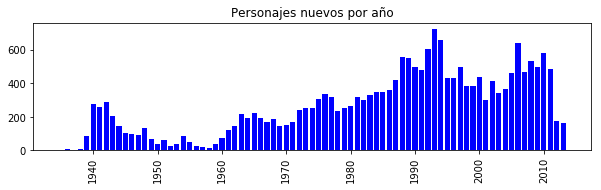

In [136]:

eventCountsByYear = comicsDF.groupby('YEAR')['TOTAL'].sum()
x = eventCountsByYear.index
plot_chart(x, eventCountsByYear.values, "Personajes nuevos por año", show_line=False)

## 3.2. Análisis de probabilidades sobre dos variables: Alineación y Tipo de Identidad 
Enunciado original: Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.
Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.

En este punto, se ha decidido utilizar dos variables categoricas que pueden resultar interesantes:

* ID: Identidad del personaje (se refiere a si es privada, secreta, etc).
* ALIGN: Alineación (se refiere a si es de los buenos, malos, etc).


In [279]:
tableJoin = pandas.crosstab(index=comicsDF['ALIGN'], columns=comicsDF['ID'], margins=True).apply(lambda r: r/len(comicsDF),axis=1)
tableJoinWithoutMargins = pandas.crosstab(index=comicsDF['ALIGN'], columns=comicsDF['ID'], margins=False).apply(lambda r: r/len(comicsDF),axis=1)

tableJoin

ID,Identity Unknown,Known to Authorities Identity,No Dual Identity,Public Identity,Secret Identity,UNKNOWN,All
ALIGN,,,,,,,
Bad Characters,0.000331,0.000142,0.019247,0.097371,0.194694,0.105646,0.417431
Good Characters,0.000000,0.000473,0.025820,0.127636,0.106261,0.060579,0.320770
Neutral Characters,0.000095,0.000095,0.015227,0.042041,0.041095,0.020429,0.118982
Reformed Criminals,0.000000,0.000000,0.000000,0.000047,0.000047,0.000047,0.000142
UNKNOWN,0.000000,0.000000,0.011728,0.040528,0.033482,0.056937,0.142675
All,0.000426,0.000709,0.072023,0.307623,0.375579,0.243639,1.000000


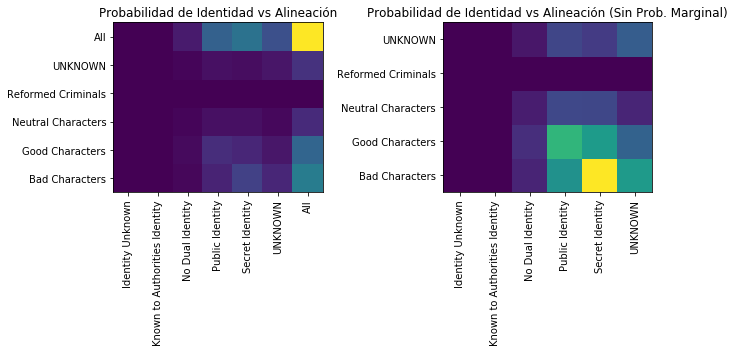

In [280]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pcolor(tableJoin)
plt.title('Probabilidad de Identidad vs Alineación')
plt.yticks(numpy.arange(0.5, len(tableJoin.index), 1), tableJoin.index)
plt.xticks(numpy.arange(0.5, len(tableJoin.columns), 1), tableJoin.columns)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.pcolor(tableJoinWithoutMargins)
plt.title('Probabilidad de Identidad vs Alineación (Sin Prob. Marginal)')
plt.yticks(numpy.arange(0.5, len(tableJoinWithoutMargins.index), 1), tableJoinWithoutMargins.index)
plt.xticks(numpy.arange(0.5, len(tableJoinWithoutMargins.columns), 1), tableJoinWithoutMargins.columns)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


Se observa que la mayor parte de la probabilidad de ocurrencia se da para la conjunción entre los valores "Good Characters" y "Bad Characters" de la variable "ALIGN" y los valores "Public Identity" y "Private Identity". Por ello se ha decidido investigar un poco mas estos casos. 
Para ello, y teniendo en cuenta la baja frecuencia de muestras de los demas casos (baja probabilidad conjunta), se han creado dos nuevas variables categoricas donde se agrupan algunas categorias. 
Las nuevas variables categoricas son: 
* ID_AGREGATE: Identidad agregada. Esta variable se ha creado a partir de la variable categórica ID, pero se ha reducido los valores posibles a tres: ['Public Identity', 'Secret Identity', 'Others'] siendo esta última la que agrupa diferentes valores (esto porque Marvel agrega algunas categorías que no tenía DC Comics).
* ALIGN_AGREGATE: Alineación agregada. Esta variable se ha creado a partir de la variable categórica ALIGN, pero se ha reducido los valores posibles a tres: ['Bad Characters', 'Good Characters', 'Others'] siendo esta última la que agrupa diferentes valores (esto porque Marvel agrega algunas categorías que no tenía DC Comics).

ID_AGREGATE,Other,Public Identity,Secret Identity,All
ALIGN_AGREGATE,,,,
Bad Characters,0.125366,0.097371,0.194694,0.417431
Good Characters,0.086872,0.127636,0.106261,0.320770
Other,0.104559,0.082616,0.074624,0.261799
All,0.316798,0.307623,0.375579,1.000000


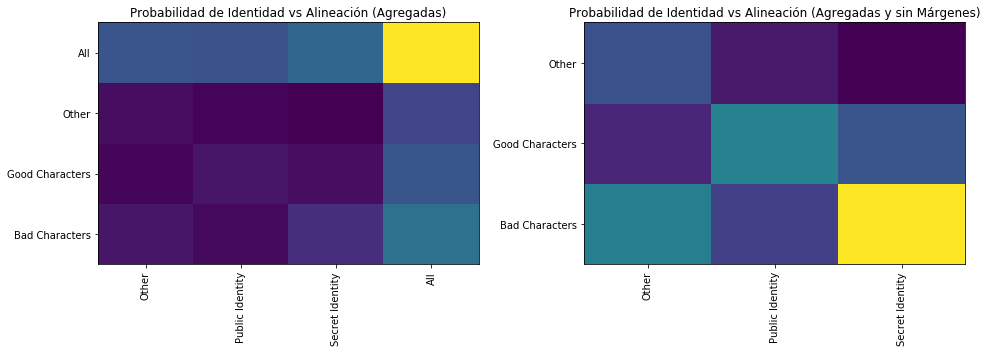

In [281]:
comicsDF['ID_AGREGATE'] = comicsDF.apply(lambda row: row['ID'] if row['ID'] == 'Public Identity' or row['ID'] == 'Secret Identity' else OTHER_LABEL, axis = 1)
comicsDF['ALIGN_AGREGATE'] = comicsDF.apply(lambda row: row['ALIGN'] if row['ALIGN'] == 'Bad Characters' or row['ALIGN'] == 'Good Characters' else OTHER_LABEL, axis = 1)
tableJoinAgg = pandas.crosstab(index=comicsDF['ALIGN_AGREGATE'], columns=comicsDF['ID_AGREGATE'], margins=True).apply(lambda r: r/len(comicsDF),axis=1) 
tableJoinAggWithoutMargin = pandas.crosstab(index=comicsDF['ALIGN_AGREGATE'], columns=comicsDF['ID_AGREGATE'], margins=False).apply(lambda r: r/len(comicsDF),axis=1) 

#tableJoinAggFrec = pandas.crosstab(index=comicsDF['ALIGN_AGREGATE'], columns=comicsDF['ID_AGREGATE'], margins=True)


plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.pcolor(tableJoinAgg)
plt.title('Probabilidad de Identidad vs Alineación (Agregadas)')
plt.yticks(numpy.arange(0.5, len(tableJoinAgg.index), 1), tableJoinAgg.index)
plt.xticks(numpy.arange(0.5, len(tableJoinAgg.columns), 1), tableJoinAgg.columns)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.pcolor(tableJoinAggWithoutMargin)
plt.title('Probabilidad de Identidad vs Alineación (Agregadas y sin Márgenes)')
plt.yticks(numpy.arange(0.5, len(tableJoinAggWithoutMargin.index), 1), tableJoinAggWithoutMargin.index)
plt.xticks(numpy.arange(0.5, len(tableJoinAggWithoutMargin.columns), 1), tableJoinAggWithoutMargin.columns)
plt.xticks(rotation=90)
plt.tight_layout()




#plt.subplot(1, 2, 2)
#plt.pcolor(tableJoinAggFrec)
#plt.title('Probabilidad de Identidad vs Alineación (Agregadas)')
#plt.yticks(numpy.arange(0.5, len(tableJoinAgg.index), 1), tableJoinAgg.index)
#plt.xticks(numpy.arange(0.5, len(tableJoinAgg.columns), 1), tableJoinAgg.columns)
#plt.xticks(rotation=90)
#plt.show()


tableJoinAgg

In [282]:
badCharAndSecretProb = tableJoinAgg.iloc[0, 2]
badCharProb = tableJoinAgg.iloc[0, 3]
secretIdentityProb = tableJoinAgg.iloc[3, 2]

print("La probabilidad conjunta P('Bad Character', 'Secret Identity') es {} ".format(badCharAndSecretProb))
print("Además, vemos que P('Bad Character') = {}   y    P('Secret Identity') = {}".format(badCharAndSecretProb, badCharProb * secretIdentityProb))
print("\nSi P('Bad Character', 'Secret Identity') es igual a P('Bad Character') * P('Secret Identity') son independientes.")
print("Pero observamos que: P('Bad Character', 'Secret Identity') = {} \nes distinto de P('Bad Character') * P('Secret Identity') = {} \nPor ello debemos inferir que son variables dependientes.".format(badCharAndSecretProb, badCharProb * secretIdentityProb))


La probabilidad conjunta P('Bad Character', 'Secret Identity') es 0.19469403196822094 
Además, vemos que P('Bad Character') = 0.19469403196822094   y    P('Secret Identity') = 0.15677851754989558

Si P('Bad Character', 'Secret Identity') es igual a P('Bad Character') * P('Secret Identity') son independientes.
Pero observamos que: P('Bad Character', 'Secret Identity') = 0.19469403196822094 
es distinto de P('Bad Character') * P('Secret Identity') = 0.15677851754989558 
Por ello debemos inferir que son variables dependientes.


## 3.3.
Enunciado Original: Responda a la siguientes preguntas: ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?

Del resultado del punto 3.2 se ha encontrado una aparente correlación entre algunos valores de la variable "ID" y "ALIGN". Por ello, resulta interesante observar si existe alguna relación interesante.

Para este análisis, nos vamos a centrar en dos valores de: 
* ID: [Public Identity, Secret Identity]
* ALIGN: [Bad Characters, Good Characters]



# 3.4 ¿Constituyen los pelados un peligro para el Universo Marvel?

A partir de esta hipótesis, se analizaron los datos disponibles. Lamentablemente, la información del dataset correspondiente a DC Comics no contiene la categoría "Bald" o "No Hair" y en su lugar dejan a estos personajes con un valor NaN (pero que impide diferenciar los casos en que simplemente no existe dicha información). 
Por ello, este análisis solo se hará en este caso con la información disponible de personajes del Universo Marvel. 
A partir de contabilizar la frecuencia de las muestras en una tabla de contingencia con los atributos "HAIR" (cabello) y "ALIGN" (alineación) obtenemos los siguientes datos:

In [283]:
marvelDataset['HAIR'] = marvelDataset['HAIR'].replace(numpy.nan, UNKNOWN_LABEL)
marvelDataset['ALIGN'] = marvelDataset['ALIGN'].replace(numpy.nan, UNKNOWN_LABEL)

pandas.crosstab(marvelDataset['HAIR'], marvelDataset['ALIGN'], margins=True)

ALIGN,Bad Characters,Good Characters,Neutral Characters,UNKNOWN,All
HAIR,,,,,
Auburn Hair,21,34,12,11,78
Bald,465,153,130,90,838
Black Hair,1621,1146,479,509,3755
Blond Hair,459,628,234,261,1582
Blue Hair,21,12,13,10,56
Bronze Hair,0,1,0,0,1
Brown Hair,861,776,349,353,2339
Dyed Hair,0,0,1,0,1
Gold Hair,2,4,1,1,8


Dado que nos queremos centrar en la categoría conceptual "pelados", deberemos crear una nueva variable "HAIR_AGGREGATE" que agrega varias categorías, dejando como dominio los valores "Bald" (que unifica a las categorías "Bald" y "No Hair") y "Others" (que consolida todos los demás casos).

In [284]:
marvelDataset['HAIR_AGGREGATE'] = marvelDataset.apply(lambda row: 'Bald' if row['HAIR'] == 'Bald' or row['HAIR'] == 'No Hair' else OTHER_LABEL, axis = 1)
pandas.crosstab(marvelDataset['HAIR_AGGREGATE'], marvelDataset['ALIGN'], margins=True)

ALIGN,Bad Characters,Good Characters,Neutral Characters,UNKNOWN,All
HAIR_AGGREGATE,,,,,
Bald,1137,329,331,217,2014
Other,5583,4307,1877,2595,14362
All,6720,4636,2208,2812,16376


Además, puede observarse se crea una nueva variable categorica que unifica varias categorías de "ALIGN" (alineación) dejando solamente "Bad Characters" y "Others" (que unifica a buenos y neutrales).

In [285]:
marvelDataset['ALIGN_AGGREGATE'] = marvelDataset.apply(lambda row: 'Bad Characters' if row['ALIGN'] == 'Bad Characters' else OTHER_LABEL, axis = 1)

obs = pandas.crosstab(marvelDataset['HAIR_AGGREGATE'], marvelDataset['ALIGN_AGGREGATE'], margins=True)
obs

ALIGN_AGGREGATE,Bad Characters,Other,All
HAIR_AGGREGATE,,,
Bald,1137,877,2014
Other,5583,8779,14362
All,6720,9656,16376


La observación sobre la tabla da la idea de que no se distribuyen uniformemente y que existiría una relación entre las variables. 
Nuestra hipótesis es que la catacterística de tener alineación con los malos ("Bad Character") está mas presente entre los pelados que entre el resto de los personajes. Es decir:
La hipótesis nula diría que personajes de la categoría Bald se distribuyen de la misma manera que Others. 
La hipótesis alternativa dice que los personajes de la categoría Bald NO se distribuyen de la misma manera que Others.

Un forma de comprobar la hipótesis nula es aplicando el test de Chi-Cuadrado. Para ello debemos construir una tabla de frecuencias esperadas, basada en la probabilidad teórica de la hipótesis nula.

1) Hay en total 6720 personajes "Bad Character" de un total de 16376.


In [286]:
probEspBadChar = obs.iloc[2, 0] / obs.iloc[2, 2]
print("Hay en total {} personajes ALIGN_AGGREGATE = 'Bad Character' de un total de {}. \n   =>Probabilidad Teorica('Bad Character')={}".format(obs.iloc[2, 0], obs.iloc[2, 2],probEspBadChar))
probEspOtherChar = obs.iloc[2, 1] /  obs.iloc[2, 2]
print("Hay en total {} personajes de ALIGN_AGGREGATE = 'Other' de un total de {}. \n   =>Probabilidad Teorica('Other')={}".format(obs.iloc[2, 1], obs.iloc[2, 2],probEspOtherChar))

frecEspBadCharBald = probEspBadChar * obs.iloc[0, 2]
frecEspOtherCharBald = probEspOtherChar * obs.iloc[0, 2]
frecEspBadCharOtherHair = probEspBadChar * obs.iloc[1, 2]
frecEspOtherCharOtherHair = probEspOtherChar * obs.iloc[1, 2]

observedArray  = numpy.array([obs.iloc[0, 0], obs.iloc[0, 1], obs.iloc[1, 0], obs.iloc[1, 1]])
expectedArray  = numpy.array([frecEspBadCharBald, frecEspOtherCharBald, frecEspBadCharOtherHair, frecEspOtherCharOtherHair])


frec = pandas.DataFrame(data = {'Bad Characters': [frecEspBadCharBald, frecEspBadCharOtherHair, frecEspBadCharBald + frecEspBadCharOtherHair], 'Other': [frecEspOtherCharBald, frecEspOtherCharOtherHair, frecEspOtherCharBald + frecEspOtherCharOtherHair] , '_All': [frecEspBadCharBald + frecEspBadCharBald, frecEspBadCharOtherHair + frecEspOtherCharOtherHair, frecEspBadCharBald + frecEspBadCharBald + frecEspBadCharOtherHair + frecEspOtherCharOtherHair]})
frec.index = ["Bald", "Other", "All"]
print("\n\nEntonces las frecuencias esperadas a partir de las probabilidades teóricas son:")
print("Si la hipótesis nula fuese correcta, cabría esperar la siguiente ")
print(frec)
print("\nEn contraste con la observada:")
print(obs)


Hay en total 6720 personajes ALIGN_AGGREGATE = 'Bad Character' de un total de 16376. 
   =>Probabilidad Teorica('Bad Character')=0.41035661944308743
Hay en total 9656 personajes de ALIGN_AGGREGATE = 'Other' de un total de 16376. 
   =>Probabilidad Teorica('Other')=0.5896433805569126


Entonces las frecuencias esperadas a partir de las probabilidades teóricas son:
Si la hipótesis nula fuese correcta, cabría esperar la siguiente 
       Bad Characters        Other          _All
Bald       826.458232  1187.541768   1652.916463
Other     5893.541768  8468.458232  14362.000000
All       6720.000000  9656.000000  16014.916463

En contraste con la observada:
ALIGN_AGGREGATE  Bad Characters  Other    All
HAIR_AGGREGATE                               
Bald                       1137    877   2014
Other                      5583   8779  14362
All                        6720   9656  16376


Se siguen observando diferencias, por lo que se aplica el test de Chi-Cuadrado:


In [287]:
import scipy.stats as stats
sqrtChiValue = (((observedArray - expectedArray)**2)/expectedArray).sum()
conf = 0.95
degreeFreedom = ((2-1)*(2-1)) # (filas - 1) * (columnas -1)
criticalValue = stats.chi2.ppf(q = conf, df = degreeFreedom)

print("El resultado del test de Chi-Cuadrado es: {}".format(sqrtChiValue))
print("Valor crítico para un nivel de confianza de {} y {} grados de libertad es: {}".format(conf, degreeFreedom, criticalValue))
print("Como el valor del test {} es mayor que el valor crítico {}, podemos rechazar la hipótesis nula, aceptando la hipótesis alternativa. ".format(sqrtChiValue, criticalValue))


El resultado del test de Chi-Cuadrado es: 225.6433890125612
Valor crítico para un nivel de confianza de 0.95 y 1 grados de libertad es: 3.8414588206941236
Como el valor del test 225.6433890125612 es mayor que el valor crítico 3.8414588206941236, podemos rechazar la hipótesis nula, aceptando la hipótesis alternativa. 


Dado que el valor obtenido en el test (225.643389) es mayor que el valor crítico (3.841458), podemos rechazar la hipótesis nula (que en universo marvel los pelados se distribuyen entre las categorías <B>Bad Character</b> (malvado) y <B>Others</b> siguiendo la misma distribución que los otros tipos de personajes). Entonces, puede aceptarse la hipótesis alternativa, que dice que tiene una distribución diferente. 

Analizaremos ahora las probabilidades conjuntas:


In [288]:
probConjObs = pandas.crosstab(marvelDataset['HAIR_AGGREGATE'], marvelDataset['ALIGN_AGGREGATE'], margins=True).apply(lambda r: r/len(marvelDataset),axis=1)
probConjObs

ALIGN_AGGREGATE,Bad Characters,Other,All
HAIR_AGGREGATE,,,
Bald,0.069431,0.053554,0.122985
Other,0.340926,0.536089,0.877015
All,0.410357,0.589643,1.000000


Puede observarse además, que el producto de las probabilidades de P(Bald) y P(Bar Character) son distintas a la probabilidad condicional obtenida de las frecuencias:

In [289]:
prob = probConjObs.iloc[0, 2] * probConjObs.iloc[2, 0]
print("P(Bald, Bar Character) = {}".format(probConjObs.iloc[0, 0]))
print("P(Bald) * P(Bar Character) = {} * {} = {}".format(probConjObs.iloc[0, 2], probConjObs.iloc[2, 0], probConjObs.iloc[0, 2] * probConjObs.iloc[2, 0]))
print("Esto tambien muestra que no existe independencia entre las variables, pues una está condicionada por la otra.")


P(Bald, Bar Character) = 0.06943087445041524
P(Bald) * P(Bar Character) = 0.12298485588666341 * 0.41035661944308743 = 0.05046764970434649
Esto tambien muestra que no existe independencia entre las variables, pues una está condicionada por la otra.


Finalmente, estudiando las probabilidades condicionales dado un valor de HAIR_AGGREGATE:

In [290]:
probCondAlignDadoHair = probConjObs.apply(lambda r: r/r['All'],axis=1)
probCondAlignDadoHair

ALIGN_AGGREGATE,Bad Characters,Other,All
HAIR_AGGREGATE,,,
Bald,0.564548,0.435452,1.0
Other,0.388734,0.611266,1.0
All,0.410357,0.589643,1.0


Podemos observar que dentro de la población seleccionada, dado un personaje que sea <b>pelado</b>, se tiene una menor probabilidad de que pertenezca a la alineación Others (formado por buenos, neutrales y desconocidos) y <b>existe mayor probabilidad de que sea un malvado que quiera dominar el mundo</b>, o al menos el Universo Marvel.